In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

In [2]:
class Dynamics():
    """
        25/03/22
    """
    def __init__(self):
        path = r'../../../data/Walmart.csv'
        self.df = pd.read_csv(
            path,
            sep=',',
            decimal='.',
            date_parser=['Date'],
        )
        
    def alterando_o_tipo_da_coluna_date_para_datetime(self):
        self.df['Date'] = pd.to_datetime(
            self.df['Date'],
            format='%d-%m-%Y'
        )

    def criando_a_coluna_month(self):
        self.df['month'] = self.df['Date'].dt.month

    def verificandos_os_diferentes_tipos_do_df(self):
        df = self.df.dtypes
        display(
            df
        )

    def analise_descritiva_do_df(self):
        df = self.df.describe().round(decimals=2)
        display(
            df
        )

    def amostragem_simples(self):
        df = self.df.sample(5, random_state=1).reset_index()
        display(
            df
        )

    def amostragem_estratificada(self):
        df = self.df['Holiday_Flag'].value_counts(normalize=True).reset_index()
        display(
            df
        )

    def contagem_de_feriados(self):
        feriados = self.df[
            self.df['Holiday_Flag'] == 1
        ]

        print(feriados.Weekly_Sales.count())

    def contagem_de_dias_normais(self):
        dias_normais = self.df[
            self.df['Holiday_Flag'] == 0
        ]

        print(dias_normais.Weekly_Sales.count())    
    
    def venda_durante_os_feriados(self):
        vendas_nos_feriados = self.df[
            self.df['Holiday_Flag'] == 1
        ]

        print(vendas_nos_feriados.Weekly_Sales.sum())
    
    def venda_durante_dias_normais(self):
        dias_normais = self.df[
            self.df['Holiday_Flag'] == 0
        ]

        print(dias_normais.Weekly_Sales.sum())
    
    def grafico_de_barra_vendas_semanais_por_mes(self):
        sns.barplot(
            data=self.df,
            x='month',
            y='Weekly_Sales',
            hue='Holiday_Flag',
        )

    def grafico_de_barra_preço_da_gasolina_por_mes(self):
        sns.barplot(
            data=self.df,
            x='month',
            y='Fuel_Price',
            hue='Holiday_Flag',
        )

    def gráfico_de_dispersão(self):
        sns.scatterplot(
            data=self.df,
            x='Unemployment',
            y='Weekly_Sales',

        )

    def agrupando_pelas_vendas_totais_nos_feriados(self):
        df = self.df

        df = df[
            (df['Holiday_Flag'] == 1)
        ]

        df = df.groupby('Store').agg({'Weekly_Sales':'sum'}).astype(int).reset_index()
        display(
            df
        )


if __name__ == '__main__':
    dynamics = Dynamics()

In [3]:
dynamics.alterando_o_tipo_da_coluna_date_para_datetime()

In [4]:
dynamics.criando_a_coluna_month()

In [5]:
dynamics.verificandos_os_diferentes_tipos_do_df()

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
month                    int64
dtype: object

In [6]:
dynamics.analise_descritiva_do_df()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00,6.45
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88,3.24
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88,1.00
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89,4.00
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87,6.00
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62,9.00
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31,12.00


In [7]:
dynamics.amostragem_simples()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,447,4,2010-06-11,1870619.23,0,78.45,2.668,126.111903,7.896,6
1,2196,16,2011-01-28,448391.99,0,20.80,3.008,191.667891,6.614,1
2,3253,23,2012-02-24,1272948.27,0,31.12,3.751,137.341103,4.261,2
3,2873,21,2010-05-07,744969.42,0,70.87,2.835,210.001102,8.200,5
4,712,5,2012-10-12,325345.41,0,66.24,3.601,223.974787,5.422,10


In [8]:
dynamics.amostragem_estratificada()

,index,Holiday_Flag
0,0,0.93007
1,1,0.06993


In [9]:
dynamics.contagem_de_feriados()

450


In [10]:
dynamics.contagem_de_dias_normais()

5985


In [11]:
dynamics.venda_durante_os_feriados()

505299551.56


In [12]:
dynamics.venda_durante_dias_normais()

6231919435.55


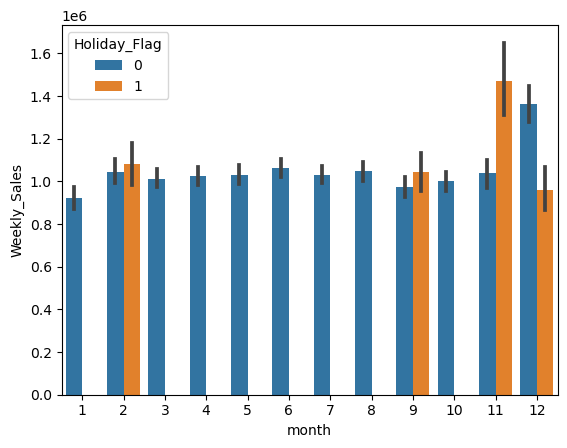

In [13]:
dynamics.grafico_de_barra_vendas_semanais_por_mes()

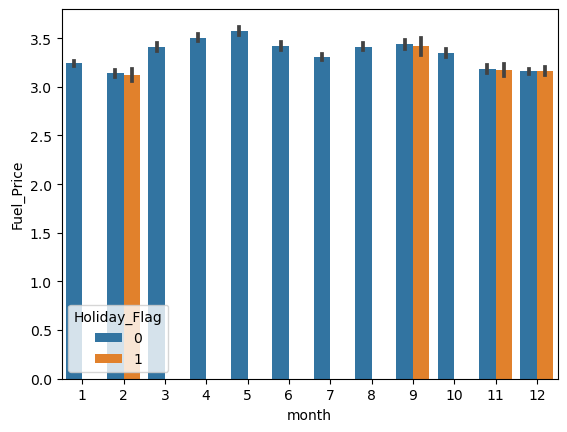

In [14]:
dynamics.grafico_de_barra_preço_da_gasolina_por_mes()

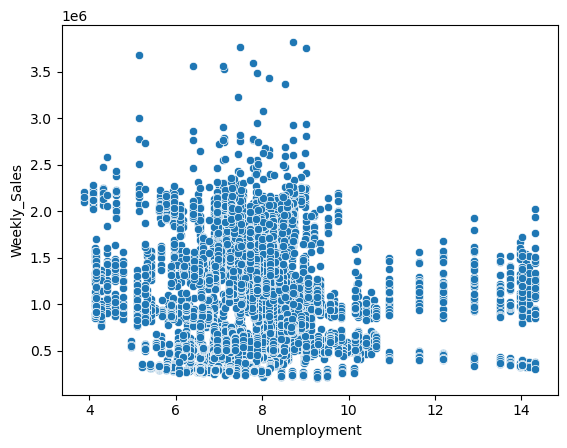

In [15]:
dynamics.gráfico_de_dispersão()